In [13]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import numpy as py
from matplotlib import pyplot as plt



In [14]:
tf.config.list_physical_devices('GPU')


[]

In [3]:
#batch_size = 64
#base_dir = 'data'


In [15]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)

In [16]:
train_generator = train_datagen.flow_from_directory(
                        r'C:\Users\Hatul Bhatt\Downloads\FractureClassifier-main (1)\FractureClassifier-main\Images',
                        target_size=(224, 224),
                        batch_size=32,
                        class_mode='categorical',
                        subset='training')

Found 1054 images belonging to 6 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
                        r'C:\Users\Hatul Bhatt\Downloads\FractureClassifier-main (1)\FractureClassifier-main\Images', # same directory as training data
                        target_size=(224, 224),
                        batch_size=32,
                        class_mode='categorical',
                        subset='validation')

Found 259 images belonging to 6 classes.


In [18]:
# Create a new Sequential model
model = Sequential()

# Adding VGG16 layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add VGG16 layers to your model
model.add(vgg_model)

# Freeze the weights of VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

# Add the rest of the layers (Flatten, Dense) to the model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming 6 output classes

In [19]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 17926854 (68.39 MB)
Trainable params: 3212166 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),  # Use 'learning_rate' instead of 'lr'
              metrics=['acc'])

total_sample = train_generator.n
n_epochs = 30

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(total_sample / 32),
    epochs=n_epochs,
    verbose=1
)

Epoch 1/30


KeyboardInterrupt: 

In [21]:
import matplotlib.pyplot as plt
#import tensorflow as tf

# Function to plot training and validation accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Example usage
# Assuming you have already defined and compiled your model and have training data

# Train the model and store history
history = model.fit(train_generator, epochs=n_epochs, validation_data=validation_generator)

# Plot training and validation accuracy
plot_accuracy(history)

Epoch 1/30
17/33 [==============>...............] - ETA: 2:50 - loss: 4.3651 - acc: 0.2251

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
OSError: broken data stream when reading image file
Traceback (most recent call last):

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\data_adapter.py", line 1064, in generator_fn
    yield x[i]
          ~^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\image_utils.py", line 479, in load_img
    img = img.resize(width_height_tuple, resample)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py", line 2164, in resize
    self.load()

  File "C:\Users\Hatul Bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\ImageFile.py", line 310, in load
    raise _get_oserror(err_code, encoder=False)

OSError: broken data stream when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_4902]

In [10]:
model.evaluate(validation_generator)

9/9 [==============================] - 32s 3s/step - loss: 1.6400 - acc: 0.5869


[1.6399755477905273, 0.5868725776672363]

In [13]:
model.save('model3.h5')


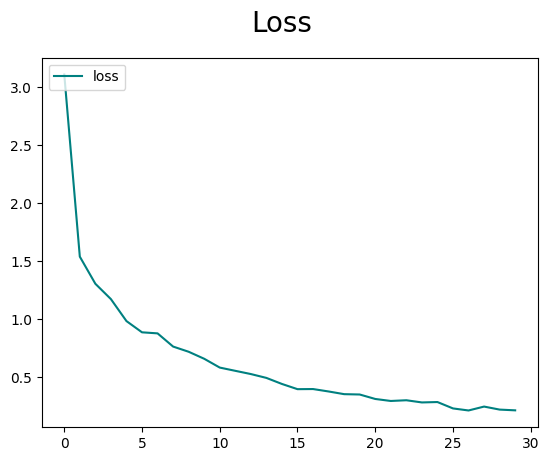

In [11]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
#plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


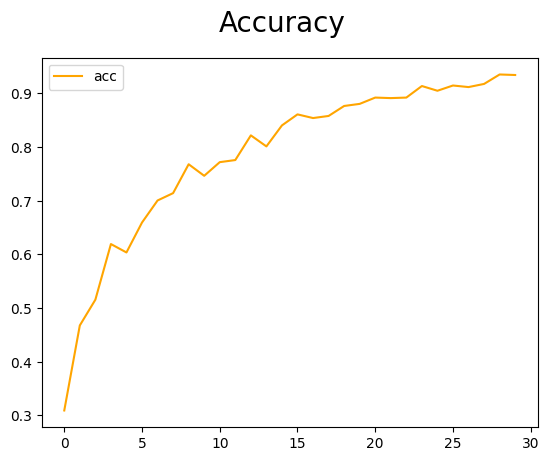

In [56]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [57]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [135]:
test_image = image.load_img(r'C:\Users\Hatul Bhatt\Downloads\FractureClassifier-main (1)\FractureClassifier-main\Images\Hairline Fracture\Hairline Fracture\1-s2.0-S1067251616000430-gr1.jpg', target_size = (200,200))

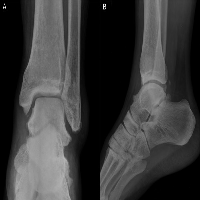

In [136]:
test_image


In [137]:
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 187ms/step


In [138]:
result

array([[2.5361511e-25, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.3021693e-21, 2.5292979e-35]], dtype=float32)

In [139]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Compression-Crush fracture")
elif result[0][2] == 1:
    print("Greenstick Fracture")
elif result[0][3] == 1:
    print("Hairline fracture")
elif result[0][4] == 1:
    print("Pathological fracture")
elif result[0][5] == 1:
    print("Spiral fracture")
else:
    print("Unknown")


Compression-Crush fracture
